# **<font style="color:blue">Project 4: Kaggle Competition - Semantic Segmentation</font>**

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>1.1. Dataset Class</h3></td> <td><h3>7</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>1.2. Visualize dataset</h3></td> <td><h3>3</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>2. Evaluation Metrics</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>3. Model</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>4.1. Train</h3></td> <td><h3>7</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>4.2. Inference</h3></td> <td><h3>3</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>5. Prepare Submission CSV</h3></td><td><h3>10</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>6. Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>

---

**In this project, you have participated in the Kaggle competition, and also submit the notebook and othe code in the course lab.**

**This Kaggle competition is a semantic segmentation challenge.**

<h2>Dataset Description </h2>
<p>The dataset consists of 3,269 images in 12 classes (including background). All images were taken from drones in a variety of scales. Samples are shown below:
<img src="https://github.com/ishann/aeroscapes/blob/master/assets/data_montage.png?raw=true" width="800" height="800">
<p>The data was splitted into public train set and private test set which is used for evaluation of submissions. You can split public subset into train and validation sets yourself.
Images are named with a unique <code>ImageId</code>. </p>
<p> You should segment and classify the images in the test set.</p>
<p>The dataset consists of landscape images taken from drones in a variety of scales.</p>

**The notebook is divided into sections. You have to write code, as mention in the section.  For other helper functions, you can write `.py` files and import them in the notebook. You have to submit the notebook along with `.py` files. Your submitted code must be runnable without any bug.**

# **<font style="color:green">1. Add and Import libraries</font>**

In [1]:
print("Optuna install...")
!pip install -qq -U optuna
print("Optuna-dashboard install...")
!pip install -qq -U optuna-dashboard
print("Struclog install...")
!pip install -qq -U structlog
#print("Onnx install...")
#!pip install -qq onnx 
print("Onnxruntime install...")
!pip install -qq onnxruntime
print("Tensorboard install...")
!pip install -qq tensorboard

Optuna install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.9 MB/s eta 0:00:0000:01
Optuna-dashboard install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 5.0 MB/s eta 0:00:00
Struclog install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 2.9 MB/s eta 0:00:00
Onnxruntime install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 81.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.1 MB/s eta 0:00:00
Tensorboard install...


In [2]:
print(100 * "-")
%pip show optuna
print(100 * "-")
%pip show optuna-dashboard
print(100 * "-")
%pip show structlog
print(100 * "-")
%pip show onnx
print(100 * "-")
%pip show onnxruntime
print(100 * "-")
%pip show torch
print(100 * "-")
%pip show tensorboard
print(100 * "-")

----------------------------------------------------------------------------------------------------
Name: optuna
Version: 4.5.0
Summary: A hyperparameter optimization framework
Home-page: https://optuna.org/
Author: Takuya Akiba
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: alembic, colorlog, numpy, packaging, PyYAML, sqlalchemy, tqdm
Required-by: optuna-dashboard
Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------------------------------------------
Name: optuna-dashboard
Version: 0.19.0
Summary: Real-time dashboard for Optuna
Home-page: https://github.com/optuna/optuna-dashboard
Author: 
Author-email: Masashi Shibata <mshibata@preferred.jp>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: bottle, optuna, packaging, scikit-learn
Required-by: 
Note: you may need to restart the kernel to use updated packages.
-----------------------------

In [3]:
import os
import json
import sys
import shutil
import random
import time
import datetime
import math
import zipfile
import threading
import cv2

import logging
import structlog

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter

from sklearn.metrics import jaccard_score

import optuna
from optuna.trial import Trial
from optuna import visualization 
from optuna_dashboard import run_server

import onnx
import onnxruntime as ort

from tqdm import tqdm

2025-08-23 00:25:46.667528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755908746.906302      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755908746.973309      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **<font style="color:green">2. Data Exploration</font>**

## ***<font style="color:purple">2.1. Base Functions</font>***

In [4]:
def copy_and_zip_folder(source_folder, destination_folder, zip_filename):
    """Copies a folder to a new location and then packs it into a ZIP file.

    Args:
        source_folder (_type_): Path to the source folder you want to copy.
        destination_folder (_type_): Path to the destination folder where the contents should be copied.
        zip_filename (_type_): Name of the ZIP file (e.g. 'archiv.zip').
    """  
    try:
        # Copying an entire folder to a new location
        shutil.copytree(source_folder, destination_folder)
        print(f"The folder '{source_folder}' was successfully copied to '{destination_folder}'.")

        # Create a ZIP archive from the copied folder
        # A ZIP file named 'archiv.zip' will be created at the same level as the copied folder
        zip_path = os.path.join(os.path.dirname(destination_folder), zip_filename)
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, dirs, files in os.walk(destination_folder):
                for file in files:
                    file_path = os.path.join(root, file)
                    # Create a relative path so that there are no absolute paths in the ZIP
                    relative_path = os.path.relpath(file_path, os.path.dirname(destination_folder))
                    zipf.write(file_path, relative_path)
        
        print(f"The folder '{destination_folder}' was successfully packed into '{zip_path}'.")

    except FileExistsError:
        print(f"Error: Destination folder '{destination_folder}' already exists. Please delete it or change the path.")
    except Exception as e:
        print(f"An error occurred: {e}")


```python
source = "<input_path>"
destination = "<output_path>"
zip_file = "<name_file>.zip"

copy_and_zip_folder(source, destination, zip_file)
```

## ***<font style="color:purple">2.2. Dataset Class</font>***

### *<font style="color:brown">2.2.1 Global settings for dataset</font>*


In [5]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 12  # Background included
DATA_PATH = os.path.join('/kaggle','input','opencv-pytorch-segmentation-project-round2')
IMAGES_FOLDER = os.path.join('imgs','imgs')
MASKS_FOLDER = os.path.join('masks','masks')
CSV_PATH_TRAIN = 'train.csv'  
CSV_PATH_TEST = 'test.csv'

### *<font style="color:brown">2.2.2 Class definition</font>*

In [6]:
class SemSegDataset(Dataset):
    """Custom Dataset for semantic segmentation

    Args:
        data_path (str): Path to data directories.
        images_folder (str): Folder with images (.jpg).
        masks_folder (str): Folder with masks (.png).
        csv_path (str): Path to CSV file with ImageID.
        image_ids (list, optional): ImageID list (if not specified, it will be loaded from CSV).
        train_val_test (str): Dataset mode ('train', 'val', 'test'). Default 'train'.
        transforms (callable, optional): Transformations for images (e.g. normalization).
        class_names (list, optional): Class names (default 0-11).
        mask_suffix (str, optional): Mask name suffix (e.g. '_mask'). Default ''.

    Returns:
        tuple: (image, mask) as torch tensors.
    """
    def __init__(self, data_path, images_folder, masks_folder, csv_path, image_ids=None, train_val_test='train', transforms=None, class_names=None, mask_suffix=''):
        self.data_path = data_path
        self.images_folder = images_folder
        self.masks_folder = masks_folder
        self.transforms = transforms
        self.class_names = class_names or [str(i) for i in range(NUM_CLASSES)]
        self.train_val_test = train_val_test
        self.mask_suffix = mask_suffix
        
        # Retrieving ImageID from CSV using Polars with explicit String dtype
        try:
            df = pl.read_csv(
                os.path.join(data_path, csv_path),
                schema_overrides={'ImageID': pl.String}
            )
            self.image_ids = image_ids or df['ImageID'].to_list()
        except Exception as e:
            raise ValueError(f"Chyba při načítání CSV {csv_path}: {str(e)}")

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        img_path = os.path.join(self.data_path, self.images_folder, f"{img_id}.jpg")
        mask_path = os.path.join(self.data_path, self.masks_folder, f"{img_id}{self.mask_suffix}.png") if self.train_val_test != 'test' else None
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Obrázek nenalezen: {img_path}")
        
        mask = torch.zeros((512, 512), dtype=torch.long)  # Default dummy mask for test
        if mask_path:
            try:
                mask_img = Image.open(mask_path).convert("L")
                # Adjust resolution and convert to classes 0-11
                mask_img = transforms.Resize((512, 512), interpolation=Image.NEAREST)(mask_img)
                mask_np = np.array(mask_img)  # 0-255
                if mask_np.max() > 11:  # Convert grayscale to classes
                    mask = torch.from_numpy((mask_np / 255 * (NUM_CLASSES - 1)).astype(np.uint8))
                else:
                    mask = torch.from_numpy(mask_np)
                # Debug: Check the range of values
                if idx < 5:
                    print(f"Sample {idx} - Mask unique values: {torch.unique(mask)}")
            except FileNotFoundError:
                warnings.warn(f"Mask not found: {mask_path}. Dummy mask used.")
                mask = torch.zeros((512, 512), dtype=torch.long)
        
        if self.transforms:
            image = self.transforms(image)  # Applying transformations to an image
            # We don't convert the mask to ToTensor() because it is already a tensor
            # Instead, we convert it to the correct type and shape
            mask = mask.long()  # Ensures that the mask is a long tensor
        
        return image, mask.squeeze()  # Mask as a long tensor for CrossEntropy

### *<font style="color:brown">2.2.3 Definition of transformation</font>*

In [7]:
train_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### *<font style="color:brown">2.2.4 Dataset creation and split dataset</font>*

In [8]:
full_dataset = SemSegDataset(DATA_PATH, IMAGES_FOLDER, MASKS_FOLDER, CSV_PATH_TRAIN, transforms=train_transforms)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# train and validation dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
# test dataset
test_dataset = SemSegDataset(DATA_PATH, IMAGES_FOLDER, MASKS_FOLDER, CSV_PATH_TEST, train_val_test='test', transforms=train_transforms)

## ***<font style="color:purple">2.3. Visualize dataset</font>***

### *<font style="color:brown">2.3.1 Function definition</font>*

In [9]:
def visualize_samples(dataset, num_samples=5):
    """Visualization of dataset samples with discrete colors for each mask class.

    Args:
        dataset (SemSegDataset): Dataset with images and masks.
        num_samples (int): Number of samples to display. Default 5.
    """
    colors = [
        [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1],
        [0, 1, 1], [1, 0.5, 0], [0.5, 0, 0.5], [0.5, 0.5, 0], [0.5, 0, 1], [0, 0.5, 0.5]
    ]  # RGB for 0-11

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples * 5))
    for i in range(num_samples):
        img, mask = dataset[i]
        img = img.permute(1, 2, 0).numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        
        mask_np = mask.numpy().astype(np.uint8)
        h, w = mask_np.shape
        colored_mask = np.zeros((h, w, 3))
        for cls in range(NUM_CLASSES):
            colored_mask[mask_np == cls] = colors[cls]
        if mask_np.max() >= NUM_CLASSES:
            colored_mask[mask_np >= NUM_CLASSES] = [0.5, 0.5, 0.5]  # Gray for invalid classes
        
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 0].axis('off')
        axes[i, 1].imshow(colored_mask)
        axes[i, 1].set_title(f"Mask {i+1}")
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

### *<font style="color:brown">2.3.2 Show data</font>*

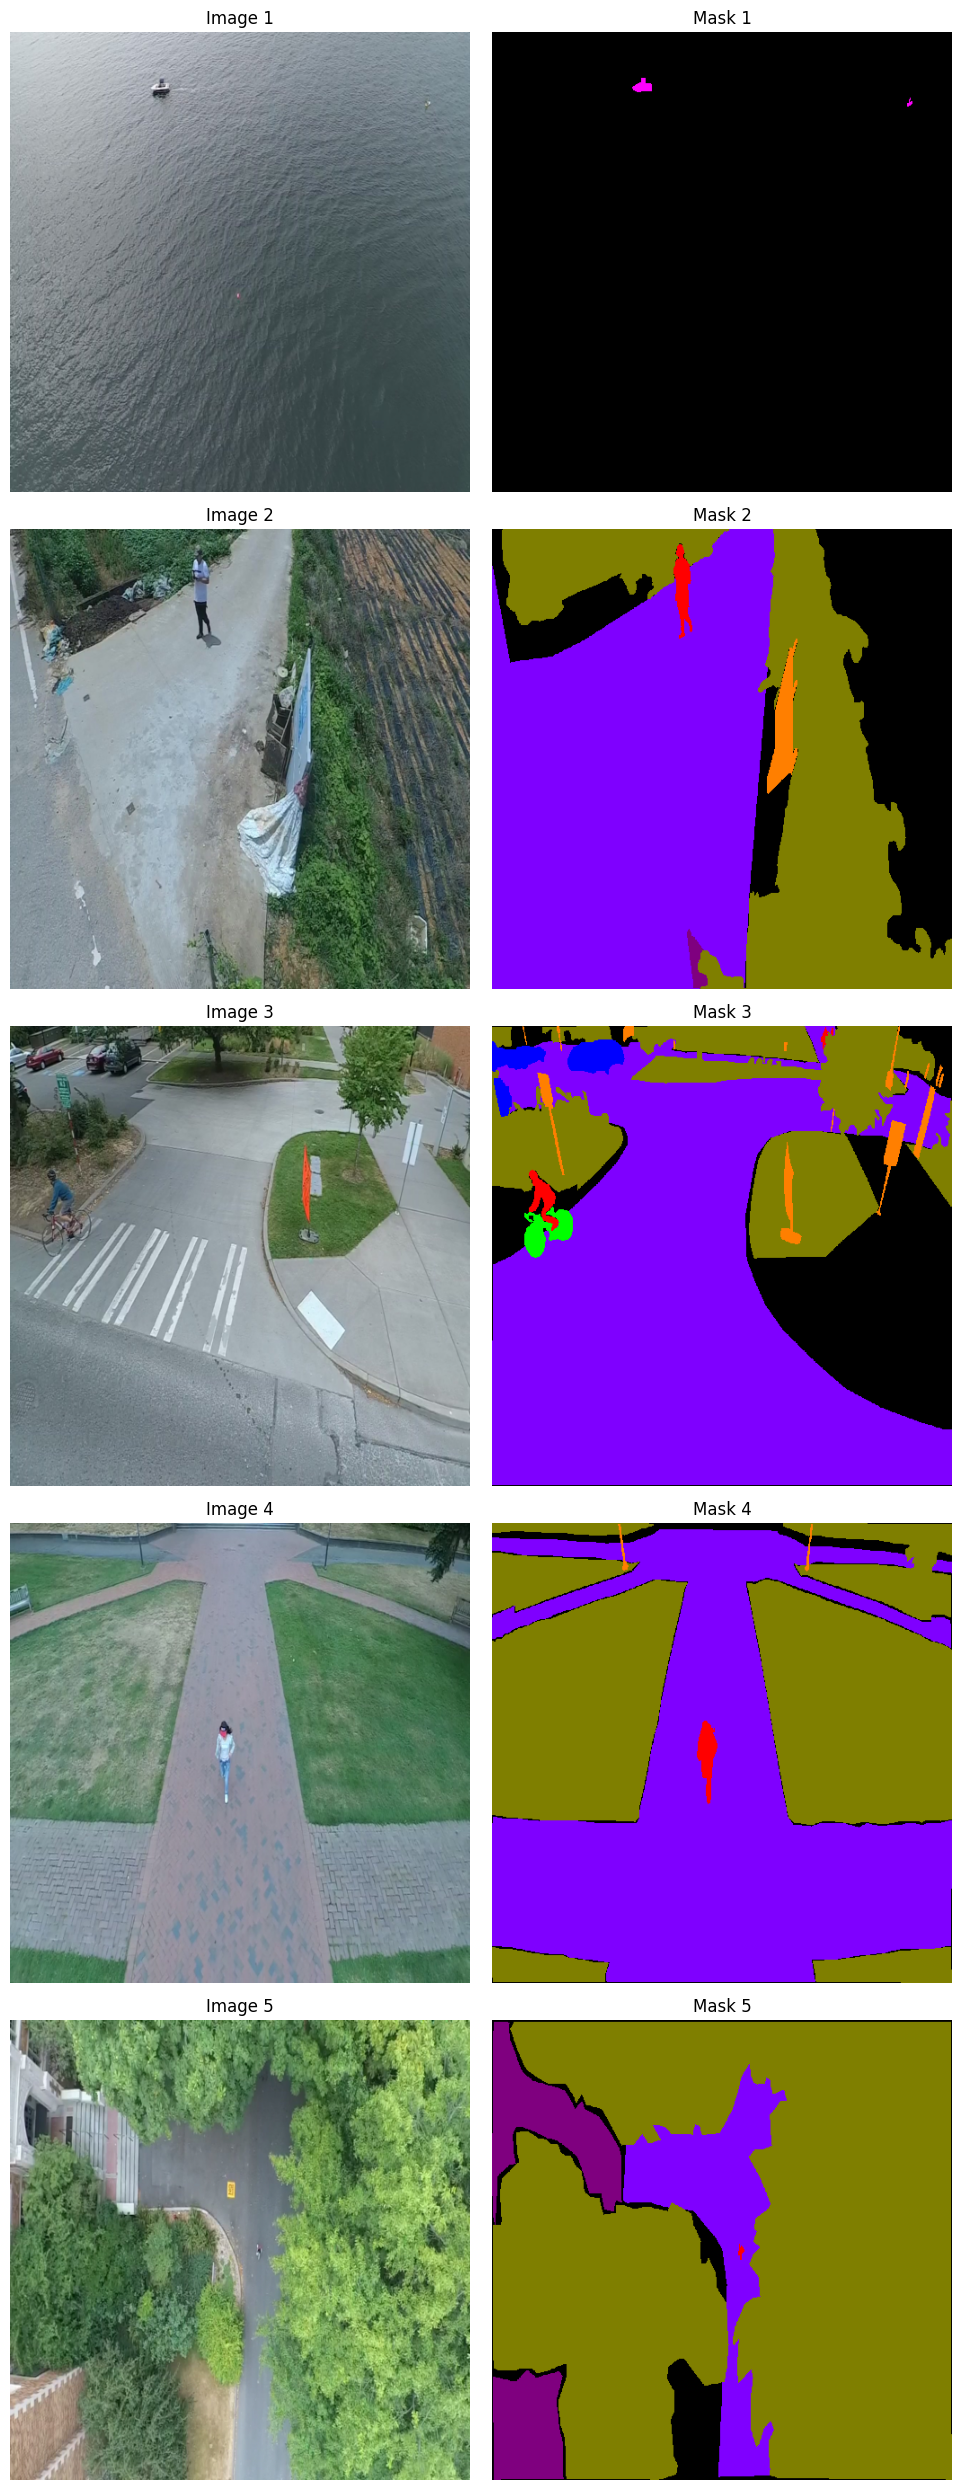

In [10]:
visualize_samples(train_dataset)

# <font style="color:green">3. Evaluation Metrics [10 Points]</font>

<p>This competition is evaluated on the mean <a href='https://en.wikipedia.org/wiki/Sørensen–Dice_coefficient'>Dice coefficient</a
>. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by: </p>

<p>$$DSC =  \frac{2 |X \cap Y|}{|X|+ |Y|}$$
$$ \small \mathrm{where}\ X = Predicted\ Set\ of\ Pixels,\ \ Y = Ground\ Truth $$ </p>
<p>The Dice coefficient is defined to be 1 when both X and Y are empty.</p>

**In this section, you have to implement the dice coefficient evaluation metric.**

# <font style="color:green">4. Model [10 Points]</font>

**In this section, you have to define your model.**

# <font style="color:green">5. Train & Inference</font>

- **In this section, you have to train the model and infer on sample data.**


- **You can write your trainer class in this section.**


- **If you are using any loss function other than PyTorch standard loss function, you have to define in this section.**


- **This section should also have optimizer and LR-schedular (if using) details.**



## <font style="color:green">5.1. Train [7 Points]</font>

**Write your training code in this sub-section.**


**This section must contain training plots (use matplotlib or share tensorboard.dev scalars logs).**

**You must have to plot the following:**
- **train loss**


- **validation loss**


- **IoU for all twelve classes (0-11) and the mean IoU of all classes on validatin data.** 

**an example of matplotlib plot:**

---

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w12-train-loss.png'>

---

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w12-val-loss.png'>

---

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w12-mean_iou.png'>

---

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w12-iou-0.png'>

---

<center>*</center>
<center>*</center>
<center>*</center>

---

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w12-iou-11.png'>

---


## <font style="color:green">5.2. Inference [3 Points]</font>

**Plot some sample inference in this sub-section.**

**for example:**

---

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w12-sample-predtiction.png'>

---



# <font style="color:green">6. Prepare Submission CSV [10 Points]</font>

**Write your code to prepare the submission CSV file.**


**Note that in the submission file, you have to write Encoded Pixels.**

[Here is a blog to understand what is Encoded Pixels.](https://medium.com/analytics-vidhya/generating-masks-from-encoded-pixels-semantic-segmentation-18635e834ad0)

# <font style="color:green">7. Kaggle Profile Link [50 Points]</font>

Share your Kaggle profile link here with us so that we can give points for the competition score. 

You should have a minimum IoU of `0.60` on the test data to get all points. If the IoU is less than `0.55`, you will not get any points for the section. 

**You must have to submit `submission.csv` (prediction for images in `test.csv`) in `Submit Predictions` tab in Kaggle to get any evaluation in this section.**